In [47]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

Following function stylize takes in a image and produces a stlized version of it using simple Gaussian blurring and k-means clustering

In [58]:
def stylize(IM):
    '''
    stylize takes in a image and returns a 
    stylized version of it as output
    
    The function internally does Gaussian 
    blurring and k-means clustering to generate
    the image. (k = 4)
    
    input - RGB/ grayscale image
    output - stylized version of input
    
    '''   
    # Blur Image
    kernel = np.ones((3,3),np.float32)/9
    I = cv2.filter2D(np.copy(IM),-1,kernel)
    # Define number of clusters
    nClusters = 4
    # Pick cluster centers
    centers = np.random.randint(0,255,(nClusters,3))
    features = np.reshape(I,(I.shape[0]*I.shape[1],3))
    # Perform k-means clustering in color space
    max_iters = 100
    idx = np.ones((features.shape[0],1))*-1
    n_iters = 0
    n_idx = np.copy(idx)
    while(n_iters < max_iters):
        n_iters = n_iters + 1
        
        # Assign closest cluster centers
        dist = np.linalg.norm(features[:,None,:]-centers[None,:,:],axis=-1)
        n_idx = np.argmin(dist,axis = 1)
        
        # Break if no change in cluster centers
        if (np.array_equal(n_idx,idx)):
            break
        idx = np.copy(n_idx)
        # Recompute cluster centers based on new assignments
        for i in range(centers.shape[0]):
            if(np.any(idx == i)):
                centers[i] = np.mean(features[idx == i],axis =0)
            else:
                centers[i] = np.ones((1,3))*np.inf
    # Generate mask
    segmented_I = np.zeros((I.shape[0],I.shape[1],3))
    mask_labels = idx.reshape(I.shape[0],I.shape[1])

    for i in range(centers.shape[0]):
        segmented_I[mask_labels==i,:] = centers[i]
    segmented_I = segmented_I.astype(np.uint8)
        
        
    return segmented_I

Helper function to plot images

In [59]:
def plotImage(I):
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(I)

Example 1

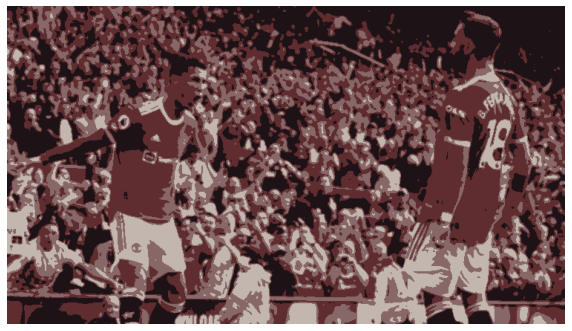

In [60]:
I = cv2.imread('I1.jpeg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
I_stylized = stylizeImage(I)
plotImage(I_stylized)

Example 2

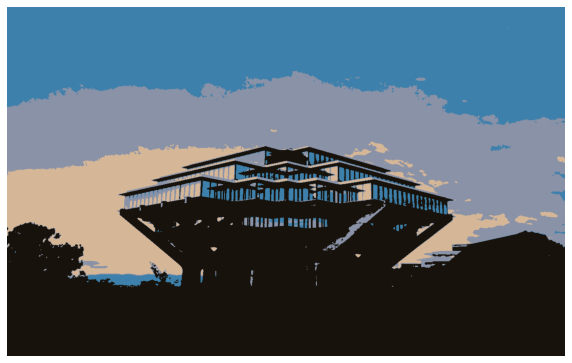

In [61]:
I = cv2.imread('I2.jpeg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
I_stylized = stylizeImage(I)
plotImage(I_stylized)

Example 3

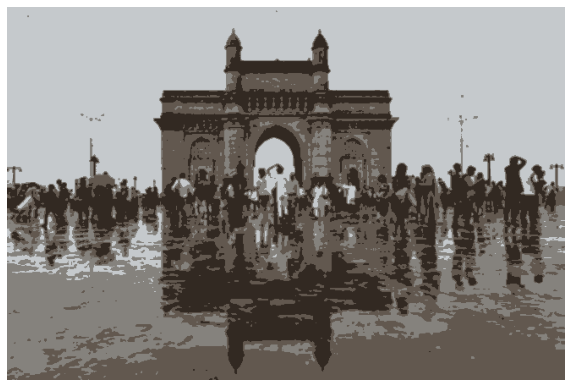

In [62]:
I = cv2.imread('I3.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
I_stylized = stylizeImage(I)
plotImage(I_stylized)